# Model `ELBMF`

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

# sys.path.append('../models/')
# from ELBMF import ELBMF

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1997
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


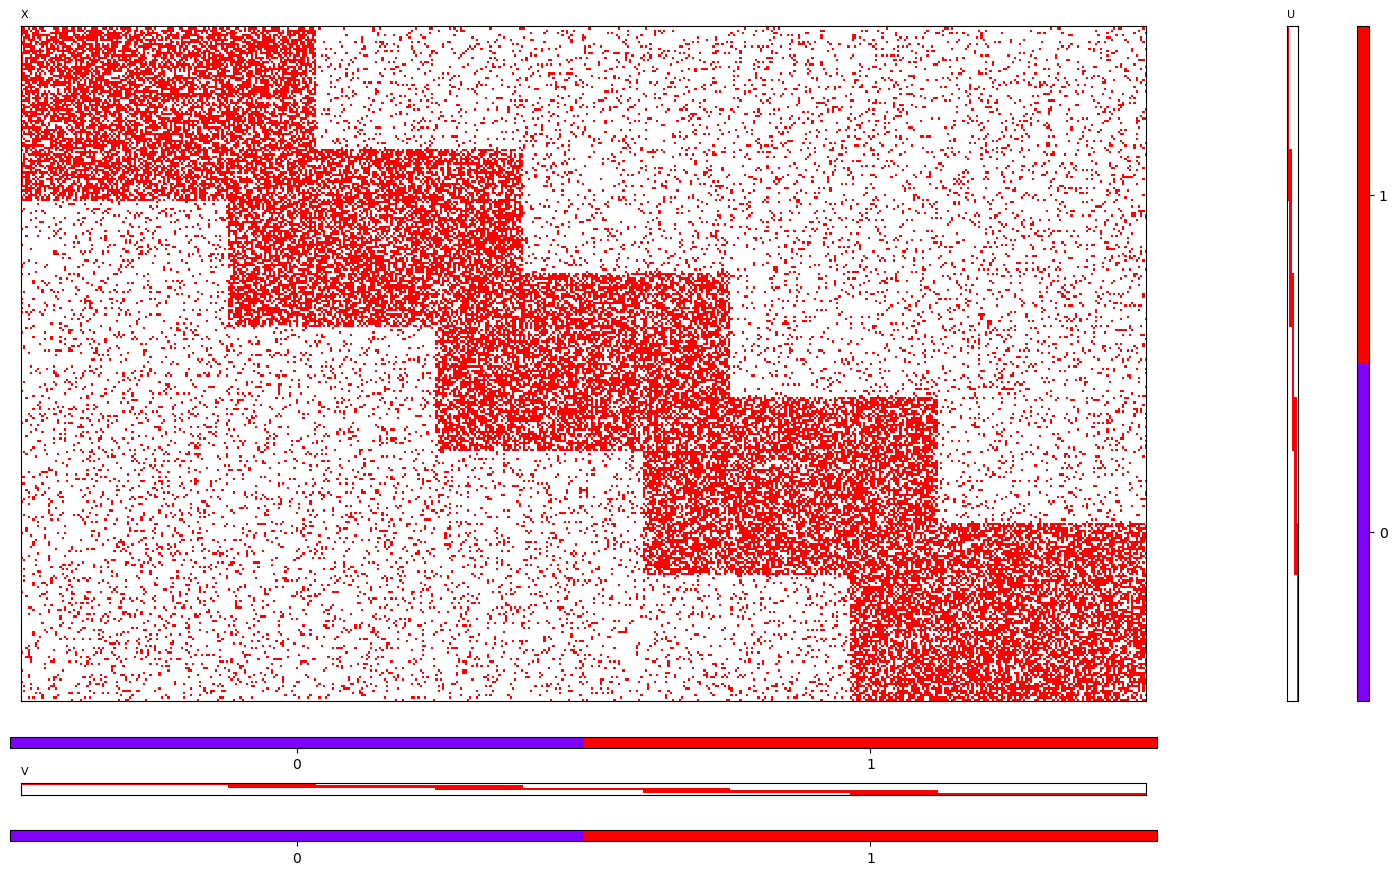

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
data.generate(seed=1997)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [3]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [4]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721127329
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721127329
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


# 1 Init U, V with `NMFSklearn` / `WNMF`

In [5]:
# from models import NMFSklearn, WNMF
# from utils import show_factor_distribution

# k = 100

# model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
# # model_nmf = WNMF(k=k, W='full', beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)

# model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

# # show_factor_distribution(U=model_nmf.U, V=model_nmf.V, resolution=100)

# 2. `ELBMF`

In [6]:
# k = 50
# # reg_l1 = 0.01
# # reg_l2 = 0.02
# # reg_growth = 1.02
# W = 'full'
# reg_l1 = 1e-7
# reg_l2 = 2e-7
# reg_growth = 1.0002
# max_iter = 2000
# min_diff = 1e-8
# tol = 1e-8
# beta = 0 # 0.0001
# seed = None
# task = 'reconstruction'

# U, V, init_method = None, None, 'uniform'
# # U, V, init_method = model_nmf.U.copy(), model_nmf.V.copy(), 'custom'
 
# model = ELBMF(k=k, U=U, V=V, W=W, init_method=init_method, reg_l1=reg_l1, reg_l2=reg_l2, reg_growth=reg_growth, tol=tol, max_iter=max_iter, min_diff=min_diff, beta=beta, seed=seed)
# model.fit(X_train=X_train, task=task, save_model=False)

In [7]:
df_list = [[[[None] * 5] * 7] * 7] * 4

In [10]:
model_list = [[[[None] * 5] * 7] * 7] * 4

for a, k in enumerate([10, 20, 50, 100]):
    for b, reg_l1 in enumerate([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]):
        for c, reg_l2 in enumerate([2e-7, 2e-6, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]):
            for d, reg_growth in enumerate([1, 1.0002, 1.002, 1.02, 1.2]):
                # reg_l1 = 0.01
                # reg_l2 = 0.02
                # reg_growth = 1.02
                W = 'full'
                # reg_l1 = 1e-7
                # reg_l2 = 2e-7
                # reg_growth = 1.0002
                max_iter = 2000
                min_diff = 1e-8
                tol = 1e-8
                beta = 0 # 0.0001
                seed = None
                task = 'reconstruction'

                U, V, init_method = None, None, 'uniform'
                # U, V, init_method = model_nmf.U.copy(), model_nmf.V.copy(), 'custom'
                
                model = ELBMF(k=k, U=U, V=V, W=W, init_method=init_method, reg_l1=reg_l1, reg_l2=reg_l2, reg_growth=reg_growth, tol=tol, max_iter=max_iter, min_diff=min_diff, beta=beta, seed=seed)
                model.fit(X_train=X_train, task=task, save_model=True, show_logs=False, show_result=False)

                model_list[a][b][c][d] = model.pickle_path

[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-07
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127389
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0006, 1.0000]


[I] n_iter: 79, err: 5445.141, gap: 0.000, U: [0.0000, 1.2695], V: [0.0000, 1.7010]:   4%|▍         | 80/2000 [00:04<01:57, 16.29it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_18-56-34_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127394
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 115, err: 5421.529, gap: 0.000, U: [0.0000, 1.6830], V: [0.0000, 1.8638]:   6%|▌         | 116/2000 [00:06<01:46, 17.70it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_18-56-40_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127400
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 53, err: 5464.871, gap: 0.000, U: [0.0000, 1.3169], V: [0.0000, 1.8907]:   3%|▎         | 54/2000 [00:02<01:47, 18.06it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_18-56-43_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127403
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 2001, err: 9043.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: : 2002it [01:42, 19.50it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_18-58-26_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127506
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 242, err: 9135.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 243/2000 [00:11<01:26, 20.27it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_18-58-38_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-06
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127518
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0012, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 138, err: 5356.614, gap: 0.000, U: [0.0000, 1.6106], V: [0.0000, 1.8211]:   7%|▋         | 139/2000 [00:06<01:31, 20.38it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_18-58-45_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127525
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 62, err: 5482.638, gap: 0.000, U: [0.0000, 1.6104], V: [0.0000, 1.8489]:   3%|▎         | 63/2000 [00:03<01:36, 20.13it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_18-58-48_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127528
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5331.007, gap: 0.017, U: [0.0000, 1.9267], V: [0.0000, 1.8232]: : 2002it [01:39, 20.21it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-00-27_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127627
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1996, err: 9143.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: 100%|█████████▉| 1997/2000 [01:42<00:00, 19.43it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-02-10_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127730
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 229, err: 9056.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 230/2000 [00:11<01:27, 20.17it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-02-22_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-05
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127742
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0004, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0026, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 199, err: 5358.121, gap: 0.003, U: [0.0000, 1.8612], V: [0.0000, 1.8750]:  10%|█         | 200/2000 [00:09<01:28, 20.31it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-02-31_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127752
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5344.015, gap: 0.005, U: [0.0000, 1.6708], V: [0.0000, 2.2713]: : 2002it [01:37, 20.43it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-04-10_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127850
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5330.710, gap: 0.175, U: [0.0000, 1.9701], V: [0.0000, 1.8320]: : 2002it [01:39, 20.17it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-05-49_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721127949
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1875, err: 9024.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  94%|█████████▍| 1876/2000 [01:32<00:06, 20.21it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-07-22_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128042
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 217, err: 9018.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  11%|█         | 218/2000 [00:10<01:28, 20.14it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-07-33_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.0002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128053
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 517, err: 5358.250, gap: 0.033, U: [0.0000, 1.9887], V: [0.0000, 2.3898]:  26%|██▌       | 518/2000 [00:25<01:12, 20.47it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-07-58_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128078
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5332.776, gap: 0.051, U: [0.0000, 3.0127], V: [0.0000, 1.8589]: : 2002it [01:37, 20.46it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-09-36_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128176
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5336.501, gap: 1.790, U: [0.0000, 1.8903], V: [0.0000, 1.8194]: : 2002it [01:38, 20.29it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-11-14_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128274
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 1758, err: 8786.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  88%|████████▊ | 1759/2000 [01:27<00:11, 20.19it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-12-42_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128362
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 204, err: 9109.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|█         | 205/2000 [00:10<01:27, 20.40it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-12-52_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128372
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 180, err: 5369.243, gap: 0.320, U: [0.0000, 1.6960], V: [0.0000, 1.7956]:   9%|▉         | 181/2000 [00:08<01:28, 20.48it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-13-01_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128381
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0001, 0.1692]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 2001, err: 5343.956, gap: 0.491, U: [0.0000, 1.6729], V: [0.0000, 2.2621]: : 2002it [01:38, 20.43it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-14-39_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128479
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5332.976, gap: 17.708, U: [0.0000, 3.6256], V: [0.0000, 1.7904]: : 2002it [01:39, 20.20it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-16-18_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128578
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1645, err: 9052.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  82%|████████▏ | 1646/2000 [01:21<00:17, 20.30it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-17-40_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128660
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0008, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 192, err: 9544.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|▉         | 193/2000 [00:09<01:30, 19.92it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-17-49_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.02
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128669
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5336.364, gap: 3.299, U: [0.0000, 2.0324], V: [0.0000, 1.8558]: : 2002it [01:38, 20.33it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-19-28_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128768
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0007, 1.0000]


[I] n_iter: 2001, err: 5337.001, gap: 4.783, U: [0.0000, 1.8875], V: [0.0000, 1.8773]: : 2002it [01:39, 20.12it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-21-08_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.02
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128868
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 2001, err: 5350.738, gap: 145.864, U: [0.0000, 1.9204], V: [0.0000, 1.7862]: : 2002it [01:38, 20.34it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-22-46_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.02
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721128966
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1692]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0006, 1.0000]


[I] n_iter: 1525, err: 9050.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  76%|███████▋  | 1526/2000 [01:15<00:23, 20.26it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-24-02_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.02
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129042
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 179, err: 9661.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   9%|▉         | 180/2000 [00:08<01:30, 20.21it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-24-11_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.2
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129051
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5333.563, gap: 31.299, U: [0.0000, 3.8260], V: [0.0000, 1.7932]: : 2002it [01:39, 20.20it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-25-50_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.2
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129150
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5331.897, gap: 43.483, U: [0.0000, 1.8147], V: [0.0000, 1.7957]: : 2002it [01:39, 20.10it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-27-30_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.2
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129250
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1692], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0011, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 2001, err: 5690.163, gap: 634.575, U: [0.0000, 1.2200], V: [0.0000, 1.3549]: : 2002it [01:38, 20.37it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-29-08_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.2
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129348
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1414, err: 9001.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  71%|███████   | 1415/2000 [01:10<00:29, 20.04it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-30-19_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-07
[I] reg_l2       : 0.2
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129419
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 165, err: 9936.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   8%|▊         | 166/2000 [00:08<01:35, 19.30it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-30-27_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-07
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129427
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 107, err: 5445.260, gap: 0.001, U: [0.0000, 1.5432], V: [0.0000, 1.8438]:   5%|▌         | 108/2000 [00:05<01:32, 20.48it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-30-32_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129432
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 123, err: 5388.322, gap: 0.001, U: [0.0000, 2.6463], V: [0.0000, 1.8258]:   6%|▌         | 124/2000 [00:06<01:32, 20.29it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-30-39_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129439
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0008, 1.0000]


[I] n_iter: 88, err: 5415.518, gap: 0.001, U: [0.0000, 2.0922], V: [0.0000, 1.9181]:   4%|▍         | 89/2000 [00:04<01:35, 19.93it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-30-43_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129443
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 9053.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: : 2002it [01:39, 20.19it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-32-22_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129543
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0002, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0012, 1.0000]


[I] n_iter: 242, err: 9202.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 243/2000 [00:12<01:27, 20.15it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-32-35_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-06
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129555
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 80, err: 5465.890, gap: 0.001, U: [0.0000, 2.3837], V: [0.0000, 2.0549]:   4%|▍         | 81/2000 [00:04<01:34, 20.24it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-32-39_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129559
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 116, err: 5425.166, gap: 0.001, U: [0.0000, 1.9746], V: [0.0000, 1.9476]:   6%|▌         | 117/2000 [00:05<01:34, 20.03it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-32-45_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129565
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 39, err: 5592.141, gap: 0.001, U: [0.0000, 1.1478], V: [0.0000, 1.9376]:   2%|▏         | 40/2000 [00:01<01:37, 20.07it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-32-47_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129567
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1995, err: 8979.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: 100%|█████████▉| 1996/2000 [01:38<00:00, 20.29it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-34-25_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129665
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0008, 1.0000]


[I] n_iter: 229, err: 9182.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 230/2000 [00:11<01:28, 20.05it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-34-36_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-05
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129676
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 326, err: 5338.803, gap: 0.004, U: [0.0000, 1.7148], V: [0.0000, 1.8647]:  16%|█▋        | 327/2000 [00:16<01:22, 20.31it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-34-53_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129693
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 468, err: 5339.796, gap: 0.004, U: [0.0000, 1.9278], V: [0.0000, 1.9463]:  23%|██▎       | 469/2000 [00:23<01:17, 19.87it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-35-16_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129716
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5336.389, gap: 0.182, U: [0.0000, 1.9262], V: [0.0000, 1.9082]: : 2002it [01:39, 20.15it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-36-56_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129816
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 1878, err: 8920.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  94%|█████████▍| 1879/2000 [01:32<00:05, 20.21it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-38-29_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129909
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 217, err: 9238.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  11%|█         | 218/2000 [00:10<01:28, 20.15it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-38-40_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.0002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129920
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 715, err: 5344.911, gap: 0.031, U: [0.0000, 1.6955], V: [0.0000, 1.7358]:  36%|███▌      | 716/2000 [00:35<01:03, 20.25it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-39-15_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721129955
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5330.518, gap: 0.048, U: [0.0000, 1.8504], V: [0.0000, 1.8850]: : 2002it [01:43, 19.30it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-40-59_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130059
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0008, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5332.779, gap: 1.860, U: [0.0000, 3.2591], V: [0.0000, 1.7887]: : 2002it [01:39, 20.03it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-42-39_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130159
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 1760, err: 8974.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  88%|████████▊ | 1761/2000 [01:33<00:12, 18.91it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-44-12_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130252
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 204, err: 9256.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|█         | 205/2000 [00:10<01:28, 20.31it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-44-22_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130262
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 2001, err: 5331.081, gap: 0.318, U: [0.0000, 1.9540], V: [0.0000, 1.7607]: : 2002it [01:39, 20.03it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-46-02_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130362
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5330.518, gap: 0.479, U: [0.0000, 1.7786], V: [0.0000, 1.8661]: : 2002it [01:38, 20.30it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-47-41_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130461
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5336.662, gap: 17.416, U: [0.0000, 1.8906], V: [0.0000, 1.9677]: : 2002it [01:38, 20.31it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-49-20_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130560
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1643, err: 8990.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  82%|████████▏ | 1644/2000 [01:22<00:17, 19.95it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-50-43_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130643
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1691], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 192, err: 9385.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|▉         | 193/2000 [00:10<01:37, 18.63it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-50-53_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.02
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130653
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5330.526, gap: 3.183, U: [0.0000, 1.8404], V: [0.0000, 1.8042]: : 2002it [01:39, 20.10it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-52-33_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130753
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5333.562, gap: 4.911, U: [0.0000, 3.5716], V: [0.0000, 1.8224]: : 2002it [01:38, 20.32it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-54-11_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.02
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130851
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5345.570, gap: 148.295, U: [0.0000, 3.4285], V: [0.0000, 1.6998]: : 2002it [01:38, 20.23it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-55-50_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.02
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721130950
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1526, err: 8944.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  76%|███████▋  | 1527/2000 [01:16<00:23, 19.98it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-57-07_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.02
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131027
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 179, err: 9463.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   9%|▉         | 180/2000 [00:08<01:30, 20.10it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_19-57-16_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.2
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131036
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0008, 1.0000]


[I] n_iter: 2001, err: 5331.679, gap: 29.169, U: [0.0000, 2.4012], V: [0.0000, 1.7691]: : 2002it [01:38, 20.29it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_19-58-55_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.2
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131135
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5345.994, gap: 44.935, U: [0.0000, 1.7424], V: [0.0000, 2.3813]: : 2002it [01:39, 20.15it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-00-34_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.2
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131234
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5659.895, gap: 623.774, U: [0.0000, 1.3824], V: [0.0000, 1.3919]: : 2002it [01:39, 20.02it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-02-14_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.2
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131335
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0011, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1410, err: 8950.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  71%|███████   | 1411/2000 [01:09<00:29, 20.24it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-03-24_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-06
[I] reg_l2       : 0.2
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131405
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 165, err: 9995.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   8%|▊         | 166/2000 [00:08<01:30, 20.27it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-03-33_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-07
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131413
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 725, err: 5335.008, gap: 0.006, U: [0.0000, 2.9305], V: [0.0000, 1.9290]:  36%|███▋      | 726/2000 [00:35<01:02, 20.28it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-04-09_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131449
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 163, err: 5400.795, gap: 0.006, U: [0.0000, 1.6533], V: [0.0000, 1.9196]:   8%|▊         | 164/2000 [00:08<01:32, 19.80it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-04-17_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131457
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 2001, err: 5343.956, gap: 0.007, U: [0.0000, 1.7871], V: [0.0000, 2.3510]: : 2002it [01:39, 20.12it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-05-57_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131557
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 8985.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: : 2002it [01:39, 20.04it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-07-37_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131657
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 242, err: 9101.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 243/2000 [00:11<01:25, 20.47it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-07-49_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-06
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131669
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 269, err: 5368.882, gap: 0.006, U: [0.0000, 2.8100], V: [0.0000, 1.8270]:  14%|█▎        | 270/2000 [00:13<01:25, 20.29it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-08-02_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131682
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0008, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 701, err: 5337.725, gap: 0.006, U: [0.0000, 1.8802], V: [0.0000, 1.7813]:  35%|███▌      | 702/2000 [00:34<01:04, 20.17it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-08-37_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131717
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5334.341, gap: 0.025, U: [0.0000, 3.0392], V: [0.0000, 1.7807]: : 2002it [01:39, 20.11it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-10-17_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131817
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1994, err: 9013.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: 100%|█████████▉| 1995/2000 [01:39<00:00, 20.10it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-11-56_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131917
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 229, err: 9033.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 230/2000 [00:11<01:27, 20.16it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-12-08_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-05
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131928
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 498, err: 5347.977, gap: 0.009, U: [0.0000, 1.8405], V: [0.0000, 1.8904]:  25%|██▍       | 499/2000 [00:24<01:14, 20.18it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-12-33_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721131953
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 2001, err: 5336.352, gap: 0.011, U: [0.0000, 1.8937], V: [0.0000, 1.9562]: : 2002it [01:39, 20.20it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-14-12_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132052
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1692]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 47, err: 5522.239, gap: 0.009, U: [0.0000, 1.4402], V: [0.0000, 1.9809]:   2%|▏         | 48/2000 [00:02<01:39, 19.67it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-14-15_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132055
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1876, err: 8947.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  94%|█████████▍| 1877/2000 [01:33<00:06, 20.02it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-15-49_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132149
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0002, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0011, 1.0000]


[I] n_iter: 217, err: 9288.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  11%|█         | 218/2000 [00:10<01:28, 20.18it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-15-59_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.0002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132159
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1246, err: 5354.939, gap: 0.041, U: [0.0000, 2.9235], V: [0.0000, 1.8579]:  62%|██████▏   | 1247/2000 [01:02<00:37, 19.90it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-17-02_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132222
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 2001, err: 5339.594, gap: 0.055, U: [0.0000, 1.9395], V: [0.0000, 1.8689]: : 2002it [01:38, 20.37it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-18-40_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132320
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5330.898, gap: 1.746, U: [0.0000, 1.7860], V: [0.0000, 1.7903]: : 2002it [01:40, 19.98it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-20-21_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132421
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 1759, err: 8999.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  88%|████████▊ | 1760/2000 [01:28<00:12, 19.97it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-21-49_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132509
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 205, err: 9257.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|█         | 206/2000 [00:10<01:29, 20.08it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-21-59_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132519
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 2001, err: 5343.956, gap: 0.335, U: [0.0000, 1.7309], V: [0.0000, 2.3410]: : 2002it [01:39, 20.16it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-23-38_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132619
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5337.802, gap: 0.506, U: [0.0000, 2.0579], V: [0.0000, 1.8675]: : 2002it [01:39, 20.12it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-25-18_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132718
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5332.969, gap: 17.754, U: [0.0000, 3.5753], V: [0.0000, 1.8068]: : 2002it [01:39, 20.13it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-26-58_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132818
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1645, err: 8943.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  82%|████████▏ | 1646/2000 [01:22<00:17, 20.05it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-28-20_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132900
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 192, err: 9369.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|▉         | 193/2000 [00:09<01:29, 20.25it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-28-30_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.02
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721132910
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1691], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5330.525, gap: 3.180, U: [0.0000, 1.7180], V: [0.0000, 1.8069]: : 2002it [01:40, 19.94it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-30-10_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133011
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5332.808, gap: 4.961, U: [0.0000, 3.5472], V: [0.0000, 1.8005]: : 2002it [01:38, 20.29it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-31-49_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.02
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133109
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5344.419, gap: 138.205, U: [0.0000, 1.6211], V: [0.0000, 1.7818]: : 2002it [01:39, 20.05it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-33-29_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.02
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133209
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 1527, err: 8946.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  76%|███████▋  | 1528/2000 [01:15<00:23, 20.14it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-34-45_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.02
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133285
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 179, err: 9488.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   9%|▉         | 180/2000 [00:09<01:32, 19.59it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-34-54_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.2
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133294
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 2001, err: 5344.595, gap: 30.484, U: [0.0000, 2.3224], V: [0.0000, 2.4152]: : 2002it [01:43, 19.36it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-36-38_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.2
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133398
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0010, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 2001, err: 5338.551, gap: 43.491, U: [0.0000, 2.3687], V: [0.0000, 1.9579]: : 2002it [01:39, 20.15it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-38-17_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.2
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133497
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5662.344, gap: 626.607, U: [0.0000, 1.2252], V: [0.0000, 1.4389]: : 2002it [01:39, 20.20it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-39-56_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.2
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133596
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1412, err: 9064.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  71%|███████   | 1413/2000 [01:11<00:29, 19.79it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-41-08_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 1e-05
[I] reg_l2       : 0.2
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133668
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0006, 1.0000]


[I] n_iter: 166, err: 9785.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   8%|▊         | 167/2000 [00:09<01:40, 18.20it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-41-17_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133677
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 663, err: 5330.611, gap: 0.054, U: [0.0000, 1.7256], V: [0.0000, 1.8117]:  33%|███▎      | 664/2000 [00:33<01:06, 19.96it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-41-50_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133710
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 2001, err: 5336.434, gap: 0.055, U: [0.0000, 1.8183], V: [0.0000, 2.0501]: : 2002it [01:38, 20.30it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-43-29_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133809
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1042, err: 5331.460, gap: 0.055, U: [0.0000, 1.9090], V: [0.0000, 1.7517]:  52%|█████▏    | 1043/2000 [00:52<00:47, 19.99it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-44-21_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133861
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 9050.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: : 2002it [01:40, 19.90it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-46-02_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133962
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 242, err: 9174.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 243/2000 [00:12<01:29, 19.57it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-46-14_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133974
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 370, err: 5364.965, gap: 0.056, U: [0.0000, 2.2247], V: [0.0000, 2.3197]:  19%|█▊        | 371/2000 [00:18<01:19, 20.37it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-46-33_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721133993
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 1643, err: 5331.068, gap: 0.055, U: [0.0000, 1.7691], V: [0.0000, 1.7871]:  82%|████████▏ | 1644/2000 [01:21<00:17, 20.05it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-47-55_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134075
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5336.396, gap: 0.073, U: [0.0000, 2.1000], V: [0.0000, 1.9745]: : 2002it [01:38, 20.32it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-49-33_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134173
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 1992, err: 8874.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: 100%|█████████▉| 1993/2000 [01:41<00:00, 19.73it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-51-14_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134274
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 230, err: 9124.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 231/2000 [00:11<01:28, 19.99it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-51-26_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134286
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 305, err: 5374.667, gap: 0.059, U: [0.0000, 2.0193], V: [0.0000, 2.2947]:  15%|█▌        | 306/2000 [00:15<01:26, 19.50it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-51-42_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134302
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5336.366, gap: 0.060, U: [0.0000, 1.8553], V: [0.0000, 1.8901]: : 2002it [01:41, 19.77it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-53-23_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134403
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0008, 1.0000], V: [0.0008, 1.0000]


[I] n_iter: 2001, err: 5343.960, gap: 0.235, U: [0.0000, 1.7060], V: [0.0000, 2.4591]: : 2002it [01:39, 20.18it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-55-03_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134503
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1879, err: 8980.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  94%|█████████▍| 1880/2000 [01:34<00:06, 19.81it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-56-38_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134598
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 217, err: 9266.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  11%|█         | 218/2000 [00:11<01:33, 19.13it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-56-49_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134609
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 124, err: 5371.169, gap: 0.087, U: [0.0000, 2.1505], V: [0.0000, 1.8063]:   6%|▋         | 125/2000 [00:06<01:34, 19.90it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_20-56-56_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134616
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5330.896, gap: 0.102, U: [0.0000, 1.9475], V: [0.0000, 1.8164]: : 2002it [01:39, 20.17it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_20-58-35_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134715
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5336.356, gap: 1.859, U: [0.0000, 1.9251], V: [0.0000, 1.7926]: : 2002it [01:40, 19.98it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-00-15_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134815
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0007, 1.0000]


[I] n_iter: 1761, err: 9034.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  88%|████████▊ | 1762/2000 [01:28<00:11, 19.97it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-01-43_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134904
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 204, err: 9223.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|█         | 205/2000 [00:10<01:30, 19.93it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-01-54_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721134914
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5336.444, gap: 0.384, U: [0.0000, 1.9570], V: [0.0000, 2.0029]: : 2002it [01:39, 20.16it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-03-33_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135014
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 2001, err: 5336.425, gap: 0.548, U: [0.0000, 1.9987], V: [0.0000, 1.8420]: : 2002it [01:39, 20.05it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-05-14_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135114
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5331.317, gap: 16.761, U: [0.0000, 1.8904], V: [0.0000, 1.7828]: : 2002it [01:40, 19.96it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-06-54_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135214
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1643, err: 8925.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  82%|████████▏ | 1644/2000 [01:22<00:17, 19.99it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-08-16_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135296
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0007, 1.0000]


[I] n_iter: 192, err: 9401.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|▉         | 193/2000 [00:09<01:31, 19.77it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-08-26_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.02
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135306
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5331.051, gap: 3.223, U: [0.0000, 1.9399], V: [0.0000, 1.8131]: : 2002it [01:39, 20.07it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-10-06_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135406
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0011, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5336.509, gap: 4.882, U: [0.0000, 2.0273], V: [0.0000, 1.9251]: : 2002it [01:39, 20.08it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-11-45_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.02
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135505
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0004, 1.0000]


[I] n_iter: 2001, err: 5349.394, gap: 142.719, U: [0.0000, 1.8278], V: [0.0000, 1.8491]: : 2002it [01:39, 20.09it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-13-25_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.02
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135606
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1525, err: 8969.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  76%|███████▋  | 1526/2000 [01:16<00:23, 20.00it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-14-42_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.02
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135682
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 179, err: 9453.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   9%|▉         | 180/2000 [00:09<01:37, 18.59it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-14-52_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.2
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135692
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 883, err: 5342.505, gap: 29.537, U: [0.0000, 1.7623], V: [0.0000, 1.8042]:  44%|████▍     | 884/2000 [00:46<00:58, 19.14it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-15-38_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.2
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135738
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0005, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5338.146, gap: 44.126, U: [0.0000, 2.2388], V: [0.0000, 1.9255]: : 2002it [01:39, 20.11it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-17-17_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.2
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135838
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5682.691, gap: 652.410, U: [0.0000, 1.2114], V: [0.0000, 1.3585]: : 2002it [01:40, 20.01it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-18-58_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.2
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721135938
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1414, err: 9014.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  71%|███████   | 1415/2000 [01:11<00:29, 19.86it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-20-09_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.0001
[I] reg_l2       : 0.2
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136009
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 166, err: 9949.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   8%|▊         | 167/2000 [00:08<01:30, 20.18it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-20-18_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136018
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1692], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 2001, err: 5336.359, gap: 0.555, U: [0.0000, 1.9475], V: [0.0000, 1.9294]: : 2002it [01:40, 19.89it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-21-58_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136118
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1690], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1585, err: 5343.961, gap: 0.553, U: [0.0000, 1.7654], V: [0.0000, 2.3903]:  79%|███████▉  | 1586/2000 [01:18<00:20, 20.16it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-23-17_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136197
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 541, err: 5341.528, gap: 0.544, U: [0.0000, 1.8506], V: [0.0000, 1.8956]:  27%|██▋       | 542/2000 [00:27<01:12, 20.06it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-23-44_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136224
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0001, 0.1692]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0007, 1.0000]


[I] n_iter: 2001, err: 9075.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: : 2002it [01:40, 19.88it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-25-25_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136325
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1691], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 242, err: 9087.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 243/2000 [00:12<01:28, 19.77it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-25-37_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136337
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5330.674, gap: 0.543, U: [0.0000, 1.9131], V: [0.0000, 1.8725]: : 2002it [01:40, 19.89it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-27-18_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136438
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0002, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0009, 1.0000]


[I] n_iter: 2001, err: 5332.776, gap: 0.564, U: [0.0000, 3.2625], V: [0.0000, 2.0481]: : 2002it [01:40, 19.91it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-28-59_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136539
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5336.403, gap: 0.572, U: [0.0000, 1.8689], V: [0.0000, 1.9364]: : 2002it [01:40, 19.86it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-30-40_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136640
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1994, err: 9032.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: 100%|█████████▉| 1995/2000 [01:40<00:00, 19.77it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-32-20_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136740
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 229, err: 9122.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 230/2000 [00:11<01:28, 19.93it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-32-32_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136752
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1454, err: 5331.134, gap: 0.544, U: [0.0000, 1.8895], V: [0.0000, 1.8468]:  73%|███████▎  | 1455/2000 [01:12<00:27, 20.02it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-33-45_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136825
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 775, err: 5336.388, gap: 0.560, U: [0.0000, 1.8290], V: [0.0000, 1.9206]:  39%|███▉      | 776/2000 [00:38<01:00, 20.15it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-34-23_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136863
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5333.404, gap: 0.749, U: [0.0000, 3.0561], V: [0.0000, 1.8940]: : 2002it [01:41, 19.76it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-36-05_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721136965
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 1879, err: 9090.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  94%|█████████▍| 1880/2000 [01:38<00:06, 19.00it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-37-44_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 2e-05
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137064
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 217, err: 9138.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  11%|█         | 218/2000 [00:11<01:31, 19.49it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-37-55_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137075
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1531, err: 5336.453, gap: 0.588, U: [0.0000, 1.8432], V: [0.0000, 1.9280]:  77%|███████▋  | 1532/2000 [01:19<00:24, 19.34it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-39-14_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137154
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5343.957, gap: 0.601, U: [0.0000, 1.6400], V: [0.0000, 2.4686]: : 2002it [01:44, 19.07it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-40-59_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137259
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5332.896, gap: 2.392, U: [0.0000, 3.2094], V: [0.0000, 1.9053]: : 2002it [01:40, 19.96it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-42-39_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137360
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1762, err: 8945.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  88%|████████▊ | 1763/2000 [01:29<00:11, 19.77it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-44-09_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.0002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137449
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 205, err: 9225.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|█         | 206/2000 [00:10<01:30, 19.78it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-44-19_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.002
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137459
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 1156, err: 5331.052, gap: 0.860, U: [0.0000, 1.9772], V: [0.0000, 1.8333]:  58%|█████▊    | 1157/2000 [00:58<00:42, 19.79it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-45-18_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.002
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137518
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0003, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5331.056, gap: 1.020, U: [0.0000, 1.9159], V: [0.0000, 1.7967]: : 2002it [01:40, 19.85it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-46-59_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.002
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137619
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 2001, err: 5344.157, gap: 17.850, U: [0.0000, 1.8677], V: [0.0000, 2.3988]: : 2002it [01:39, 20.12it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-48-39_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.002
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137719
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 1642, err: 8869.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  82%|████████▏ | 1643/2000 [01:23<00:18, 19.75it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-50-02_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.002
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137802
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 192, err: 9314.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  10%|▉         | 193/2000 [00:10<01:33, 19.26it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-50-12_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.02
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137812
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0012, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 687, err: 5336.436, gap: 3.797, U: [0.0000, 2.0284], V: [0.0000, 1.9512]:  34%|███▍      | 688/2000 [00:34<01:05, 19.92it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-50-46_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137846
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0013, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5331.072, gap: 5.192, U: [0.0000, 2.0169], V: [0.0000, 1.7979]: : 2002it [01:38, 20.22it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-52-25_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.02
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721137945
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5343.544, gap: 141.256, U: [0.0000, 1.5599], V: [0.0000, 1.7213]: : 2002it [01:36, 20.65it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-54-02_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.02
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138043
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0009, 1.0000]


[I] n_iter: 1527, err: 8969.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  76%|███████▋  | 1528/2000 [01:17<00:23, 19.69it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-55-20_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.02
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138120
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 179, err: 9421.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   9%|▉         | 180/2000 [00:09<01:31, 19.78it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_21-55-29_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.2
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138129
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1690], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0004, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5331.526, gap: 30.182, U: [0.0000, 1.8248], V: [0.0000, 1.7867]: : 2002it [01:40, 19.92it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-57-10_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.2
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138230
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5331.829, gap: 43.408, U: [0.0000, 2.5861], V: [0.0000, 1.8102]: : 2002it [01:40, 19.96it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_21-58-50_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.2
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138330
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5659.422, gap: 608.679, U: [0.0000, 1.3477], V: [0.0000, 1.4179]: : 2002it [01:41, 19.80it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_22-00-31_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.2
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138431
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0000, 1.0000]


[I] n_iter: 1410, err: 9065.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  71%|███████   | 1411/2000 [01:11<00:29, 19.71it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_22-01-43_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.001
[I] reg_l2       : 0.2
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138503
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0007, 1.0000], V: [0.0009, 1.0000]


[I] n_iter: 166, err: 9931.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:   8%|▊         | 167/2000 [00:08<01:31, 19.94it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_22-01-51_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-07
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138511
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1693], V: [0.0001, 0.1692]
[I] Normalized to  : U: [0.0011, 1.0000], V: [0.0005, 1.0000]


[I] n_iter: 2001, err: 5337.822, gap: 5.514, U: [0.0000, 2.4549], V: [0.0000, 1.9777]: : 2002it [01:39, 20.15it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_22-03-31_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138611
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 1590, err: 5336.507, gap: 5.405, U: [0.0000, 2.2862], V: [0.0000, 1.9946]:  80%|███████▉  | 1591/2000 [01:19<00:20, 19.92it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_22-04-51_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138691
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0002, 1.0000]


[I] n_iter: 2001, err: 5330.769, gap: 5.357, U: [0.0000, 2.1461], V: [0.0000, 1.9733]: : 2002it [01:40, 19.92it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_22-06-31_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138791
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0001, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0006, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 2001, err: 9001.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]: : 2002it [01:40, 19.90it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_22-08-12_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-07
[I] reg_growth   : 1.2
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138892
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0003, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0019, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 242, err: 9050.000, gap: 0.000, U: [0.0000, 1.0000], V: [0.0000, 1.0000]:  12%|█▏        | 243/2000 [00:12<01:28, 19.90it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_22-08-24_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-06
[I] reg_growth   : 1
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721138904
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1692]
[I] Normalized to  : U: [0.0001, 1.0000], V: [0.0001, 1.0000]


[I] n_iter: 2001, err: 5330.635, gap: 5.366, U: [0.0000, 2.0942], V: [0.0000, 1.9691]: : 2002it [01:40, 19.90it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_22-10-05_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.0002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721139005
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0001, 0.1693]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0007, 1.0000]


[I] n_iter: 752, err: 5344.891, gap: 5.445, U: [0.0000, 1.6364], V: [0.0000, 2.5183]:  38%|███▊      | 753/2000 [00:37<01:02, 19.94it/s]


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-16_22-10-42_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.002
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721139043
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1692], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0002, 1.0000], V: [0.0003, 1.0000]


[I] n_iter: 2001, err: 5331.116, gap: 5.385, U: [0.0000, 1.8679], V: [0.0000, 1.8494]: : 2002it [01:43, 19.34it/s]


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-16_22-12-26_ELBMF.pickle
[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 2e-06
[I] reg_growth   : 1.02
[I] rounding     : False
[I] beta         : 0
[I] tol          : 1e-08
[I] max_iter     : 2000
[I] min_diff     : 1e-08
[I] seed         : 1721139146
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] show_logs    : False
[I] show_result  : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : True
[I]   show_result: False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0009, 1.0000], V: [0.0001, 1.0000]


KeyboardInterrupt: 

In [ ]:
# import numpy as np
# import torch
# from models.ELBMF import elbmf

# X = np.array(X_train.toarray(), dtype=np.float64)
# X = torch.from_numpy(X).float()

# import torch
# from models import ELBMF

# U, V = elbmf(
#     X                   = X,                  # a Boolean n*m matrix  
#     n_components        = 100,                 # number of components
#     l1reg               = 0.001,               # l1 coefficient
#     l2reg               = 0.002,               # l2 coefficient
#     regularization_rate = lambda t: 1.0025**t,  # monotonically increasing regularization-rate function
#     maxiter             = 10000,               # maximum number of iterations
#     tolerance           = 1e-8,               # the threshold to the absolute difference between the current and previous losses determines the convergence
#     beta                = 0.0,             # inertial coefficient of iPALM
#     callback            = None,               # e.g. lambda t, U, V, fn: print(t, fn)
#     with_rounding       = True)               # rounds U and V in case of early stopping



# from utils import show_matrix, matmul
# from scipy.sparse import csr_matrix

# U_sparse, V_sparse = csr_matrix(U), csr_matrix(V)
# X_sparse = matmul(U_sparse, V_sparse, boolean=True, sparse=True)
# X_original = csr_matrix(X)

# show_matrix([(U_sparse, [1, 0], 'U'), (V_sparse, [0, 1], 'V'), (X_sparse, [1, 1], 'X_pd'), (X_original, [1, 2], 'X_gt')])

In [45]:
from utils import get_model_by_path

model_list = []

# Open the text file
with open('ELBMF_output.txt', 'r') as file:
    # Read each line
    for line in file:
        # Remove leading/trailing whitespace
        line = line.strip()
        
        # Check if the line starts with a specific string
        if line.startswith('[I] model saved as: '):
            # Fetch the rest of the string
            rest_of_string = line[len('[I] model saved as: '):]
            model_list.append('D:/OneDrive - Singapore Management University/saved_models/' + rest_of_string)

In [46]:
model_list

# with open('ELBMF_model_list.txt', 'w') as file:
#     # Write each string to a new line in the file
#     for string in model_list:
#         file.write(string + '\n')

['D:/OneDrive - Singapore Management University/saved_models/24-07-16_18-56-34_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_18-56-40_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_18-56-43_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_18-58-26_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_18-58-38_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_18-58-45_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_18-58-48_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_19-00-27_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_19-02-10_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models/24-07-16_19-02-22_ELBMF.pickle',
 'D:/OneDrive - Singapore Management University/saved_models

In [47]:
from utils import get_model_by_path

model_list = get_model_by_path(model_list)

# for a, k in enumerate([10, 20, 50, 100]):
#     for b, reg_l1 in enumerate([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]):
#         for c, reg_l2 in enumerate([2e-7, 2e-6, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]):
#             for d, reg_growth in enumerate([1, 1.0002, 1.002, 1.02, 1.2]):
#                 print("[", a, b, c, d, "]", k, reg_l1, reg_l2, reg_growth, model_list[a][b][c][d])

import pandas as pd

columns = ['k', 'reg_l1', 'reg_l2', 'reg_growth', 'Accuracy', 'Recall', 'Precision', 'F1']
df = pd.DataFrame(columns=columns)



for i, m in enumerate(model_list):

    # max_row = m['logs']['updates'].idxmax(axis=0)

    idx = -1

    accuracy = m['logs']['updates'].iloc[idx]['train'][0]['Accuracy']
    recall = m['logs']['updates'].iloc[idx]['train'][0]['Recall']
    precision = m['logs']['updates'].iloc[idx]['train'][0]['Precision']
    f1 = m['logs']['updates'].iloc[idx]['train'][0]['F1']

    new_row = {
        'k': m['k'], 
        'reg_l1': m['reg_l1'], 
        'reg_l2': m['reg_l2'], 
        'reg_growth': m['reg_growth'], 
        'Accuracy': accuracy, 
        'Recall': recall,  
        'Precision': precision, 
        'F1': f1
    }
    
    df = pd.concat([pd.DataFrame([list(new_row.values())], columns=df.columns), df], ignore_index=True)


C:\Users\nieht\AppData\Local\Temp\ipykernel_33776\1271953316.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.DataFrame([list(new_row.values())], columns=df.columns), df], ignore_index=True)


In [48]:
df

,k,reg_l1,reg_l2,reg_growth,Accuracy,Recall,Precision,F1
0,10,1.000000e-02,2.000000e-06,1.002,0.940480,0.263158,0.738132,0.387990
1,10,1.000000e-02,2.000000e-06,1.0002,0.939687,0.253859,0.727418,0.376370
2,10,1.000000e-02,2.000000e-06,1,0.939633,0.250790,0.729905,0.373313
3,10,1.000000e-02,2.000000e-07,1.2,0.940667,0.264367,0.741910,0.389826
4,10,1.000000e-02,2.000000e-07,1.02,0.940580,0.266784,0.736207,0.391646
...,...,...,...,...,...,...,...,...
178,10,1.000000e-07,2.000000e-07,1.2,0.939847,0.248001,0.740216,0.371526
179,10,1.000000e-07,2.000000e-07,1.02,0.940327,0.262879,0.734095,0.387128
180,10,1.000000e-07,2.000000e-07,1.002,0.939487,0.243258,0.735865,0.365644
181,10,1.000000e-07,2.000000e-07,1.0002,0.939413,0.241678,0.735844,0.363853
